In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os



In [8]:
data=pd.read_csv('/kaggle/input/student-performance-and-learning-style/student_performance_large_dataset.csv')

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data.head()

Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0     S00001   18  Female                    48              Kinesthetic   
1     S00002   29  Female                    30          Reading/Writing   
2     S00003   20  Female                    47              Kinesthetic   
3     S00004   23  Female                    13                 Auditory   
4     S00005   19  Female                    24                 Auditory   

   Online_Courses_Completed Participation_in_Discussions  \
0                        14                          Yes   
1                        20                           No   
2                        11                           No   
3                         0                          Yes   
4                        19                          Yes   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                              71              40                   57   
2                              60              43                   79   
3                              63              70                   60   
4                              59              63                   93   

  Use_of_Educational_Tech Self_Reported_Stress_Level  \
0                     Yes                       High   
1                     Yes                     Medium   
2                     Yes                        Low   
3                     Yes                        Low   
4                     Yes                     Medium   

   Time_Spent_on_Social_Media (hours/week)  Sleep_Hours_per_Night Final_Grade  
0                                        9                      8           C  
1                                       28                      8           D  
2                                       13                      7           D  
3                                       24                     10           B  
4                                       26                      8           C

In [11]:
data.tail()

Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
9995     S09996   20    Male                    30                 Auditory   
9996     S09997   23  Female                    16                   Visual   
9997     S09998   26    Male                    23                   Visual   
9998     S09999   18    Male                    41          Reading/Writing   
9999     S10000   24    Male                     8                   Visual   

      Online_Courses_Completed Participation_in_Discussions  \
9995                         6                          Yes   
9996                         8                          Yes   
9997                         3                          Yes   
9998                         7                          Yes   
9999                        20                          Yes   

      Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
9995                              62              58                   76   
9996                              54              84                   86   
9997                              54              40                   70   
9998                              66              45                   90   
9999                              87              40                   81   

     Use_of_Educational_Tech Self_Reported_Stress_Level  \
9995                     Yes                     Medium   
9996                     Yes                     Medium   
9997                      No                     Medium   
9998                     Yes                        Low   
9999                      No                       High   

      Time_Spent_on_Social_Media (hours/week)  Sleep_Hours_per_Night  \
9995                                       17                      6   
9996                                        6                      5   
9997                                       20                      8   
9998                                        6                      8   
9999                                       17                      4   

     Final_Grade  
9995           C  
9996           B  
9997           D  
9998           D  
9999           D

In [13]:
data.shape

(10000, 15)

In [14]:
print("Number of columns", data.shape[0])
print("Number of rows", data.shape[1])

Number of columns 10000
Number of rows 15


# Finding null data in the data sheet


In [15]:
    data.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [51]:
data[data.duplicated()]

Empty DataFrame
Columns: [Student_ID, Age, Gender, Study_Hours_per_Week, Preferred_Learning_Style, Online_Courses_Completed, Participation_in_Discussions, Assignment_Completion_Rate (%), Exam_Score (%), Attendance_Rate (%), Use_of_Educational_Tech, Self_Reported_Stress_Level, Time_Spent_on_Social_Media (hours/week), Sleep_Hours_per_Night, Final_Grade]
Index: []

thus we have no duplicates

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [17]:
data.describe()

Age  Study_Hours_per_Week  Online_Courses_Completed  \
count  10000.000000          10000.000000              10000.000000   
mean      23.478800             27.130300                 10.007900   
std        3.461986             13.002547                  6.136726   
min       18.000000              5.000000                  0.000000   
25%       20.000000             16.000000                  5.000000   
50%       23.000000             27.000000                 10.000000   
75%       27.000000             38.000000                 15.000000   
max       29.000000             49.000000                 20.000000   

       Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
count                    10000.000000    10000.000000         10000.000000   
mean                        74.922000       70.188900            75.085100   
std                         14.675437       17.649447            14.749251   
min                         50.000000       40.000000            50.000000   
25%                         62.000000       55.000000            62.000000   
50%                         75.000000       70.000000            75.000000   
75%                         88.000000       85.000000            88.000000   
max                        100.000000      100.000000           100.000000   

       Time_Spent_on_Social_Media (hours/week)  Sleep_Hours_per_Night  
count                             10000.000000           10000.000000  
mean                                 14.936500               6.979300  
std                                   9.022639               1.996965  
min                                   0.000000               4.000000  
25%                                   7.000000               5.000000  
50%                                  15.000000               7.000000  
75%                                  23.000000               9.000000  
max                                  30.000000              10.000000

In [ ]:
pip install skimpy


In [50]:
import skimpy as skim
skim.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10000  │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 15     │ │ string      │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                     ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Age                        │   0 │      0 │   23.48 │   3.462 │  18 │   20 │   23 │   27 │    29 │ ██████  │  │
│ │ Study_Hours_per_Week       │   0 │      0 │   27.13 │      13 │   5 │   16 │   27 │   38 │    49 │ █▇▇█▇█  │  │
│ │ Online_Courses_Completed   │   0 │      0 │   10.01 │   6.137 │   0 │    5 │   10 │   15 │    20 │ █▆▆▇▆█  │  │
│ │ Assignment_Completion_Rate │   0 │      0 │   74.92 │   14.68 │  50 │   62 │   75 │   88 │   100 │ █▇▇█▇█  │  │
│ │ (%)                        │     │        │         │         │     │      │      │      │       │         │  │
│ │ Exam_Score (%)             │   0 │      0 │   70.19 │   17.65 │  40 │   55 │   70 │   85 │   100 │ ▇▇▇▇▇█  │  │
│ │ Attendance_Rate (%)        │   0 │      0 │   75.09 │   14.75 │  50 │   62 │   75 │   88 │   100 │ █▇▇█▇█  │  │
│ │ Time_Spent_on_Social_Media │   0 │      0 │   14.94 │   9.023 │   0 │    7 │   15 │   23 │    30 │ ▇▇▇▆▆█  │  │
│ │ (hours/week)               │     │        │         │         │     │      │      │      │       │         │  │
│ │ Sleep_Hours_per_Night      │   0 │      0 │   6.979 │   1.997 │   4 │    5 │    7 │    9 │    10 │ ▄▄▄▄▄█  │  │
│ └────────────────────────────┴─────┴────────┴─────────┴─────────┴─────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃          ┃        ┃ chars per  ┃ words per   ┃ total      ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min      ┃ max    ┃ row        ┃ row         ┃ words      ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Student_ID │  0 │    0 │ S00001   │ S00001     │ S00001   │ S10000 │          6 │           1 │      10000 │  │
│ │ Gender     │  0 │    0 │ Male     │ Female     │ Female   │ Other  │       5.01 │           1 │      10000 │  │
│ │ Preferred_ │  0 │    0 │ Visual   │ Reading/Wr │ Auditory │ Visual │         10 │           1 │      10000 │  │
│ │ Learning_S │    │      │          │ iting      │          │        │            │             │            │  │
│ │ tyle       │    │      │          │            │          │        │            │             │            │  │
│ │ Participat │  0 │    0 │ No       │ Yes        │ No       │ Yes    │        2.6 │           1 │      10000 │  │
│ │ ion_in_Dis │    │      │          │            │    

In [22]:
cat=[]
num=[]
for column in data.columns:
    if data[column].nunique()>10:
        num.append(column) #If the number of unique values is 10 or less, the column name is added to the 'cat' list, assuming it's a categorical variable.
    else:
        cat.append(column) #If the number of unique values is 10 or less, the column name is added to the 'cat' list, assuming it's a categorical variable.
cat


['Gender',
 'Preferred_Learning_Style',
 'Participation_in_Discussions',
 'Use_of_Educational_Tech',
 'Self_Reported_Stress_Level',
 'Sleep_Hours_per_Night',
 'Final_Grade']

In [23]:
num

['Student_ID',
 'Age',
 'Study_Hours_per_Week',
 'Online_Courses_Completed',
 'Assignment_Completion_Rate (%)',
 'Exam_Score (%)',
 'Attendance_Rate (%)',
 'Time_Spent_on_Social_Media (hours/week)']

# 1.Univariate analysis

### A. Numerical Features: Age, Study Hours, Exam Score, Attendance, etc

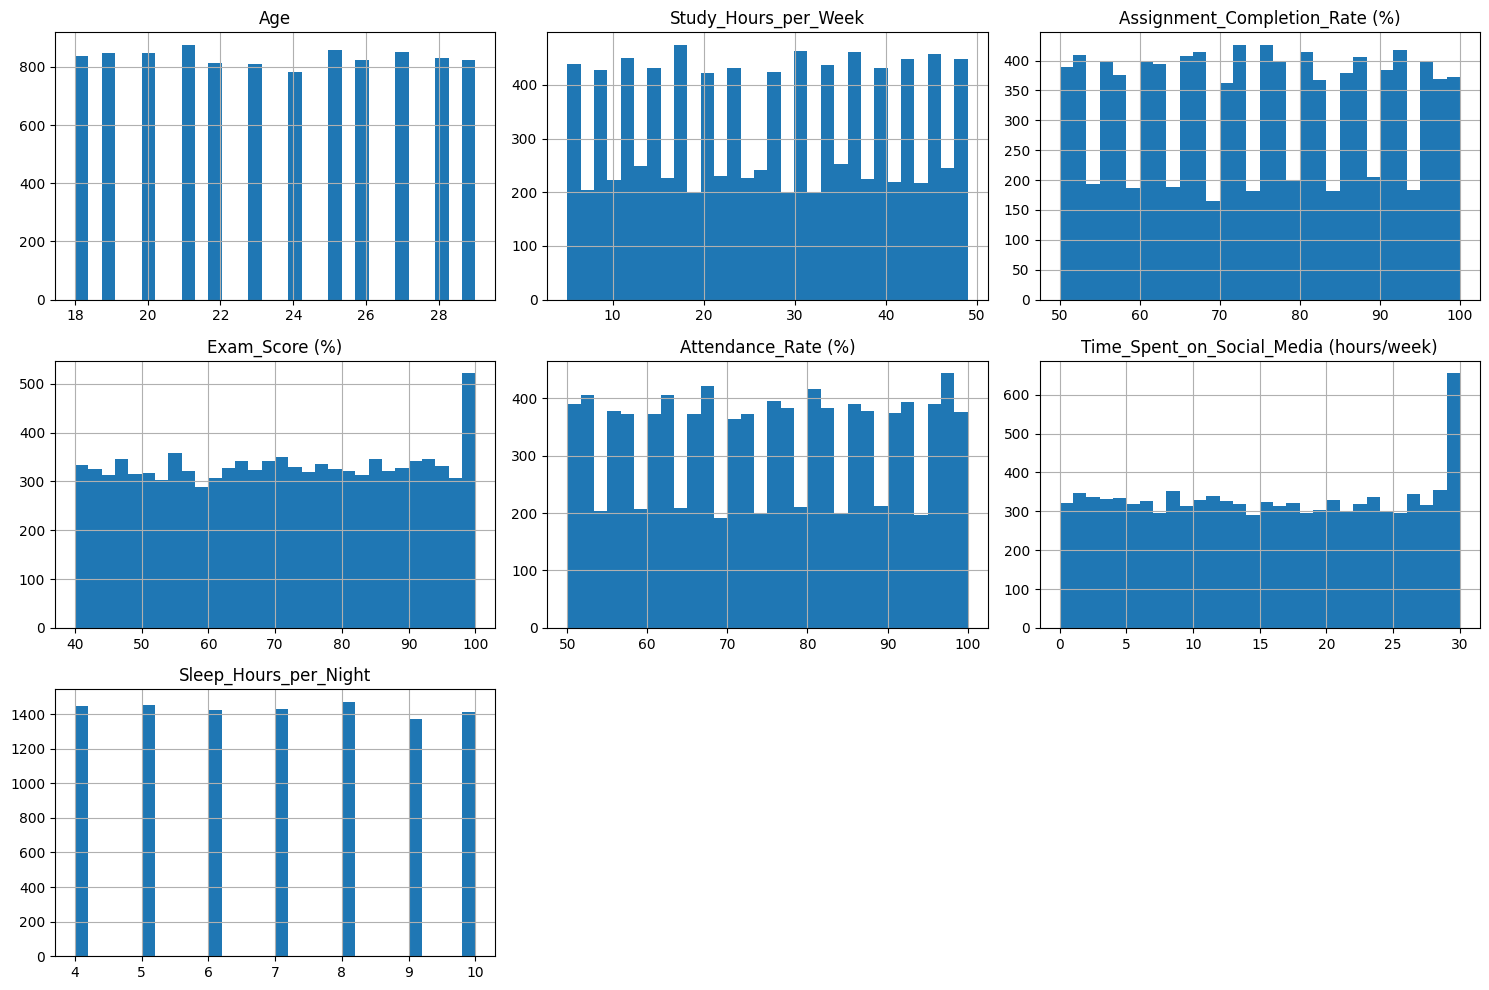

In [24]:
# Histograms for numerical features
num_cols = ["Age", "Study_Hours_per_Week", "Assignment_Completion_Rate (%)", 
            "Exam_Score (%)", "Attendance_Rate (%)", "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"]

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### B. Categorical Features: Gender, Preferred Learning Style, Participation in Discussions, Use of Educational Tech, Self Reported Stress Level, and Final Grade.¶

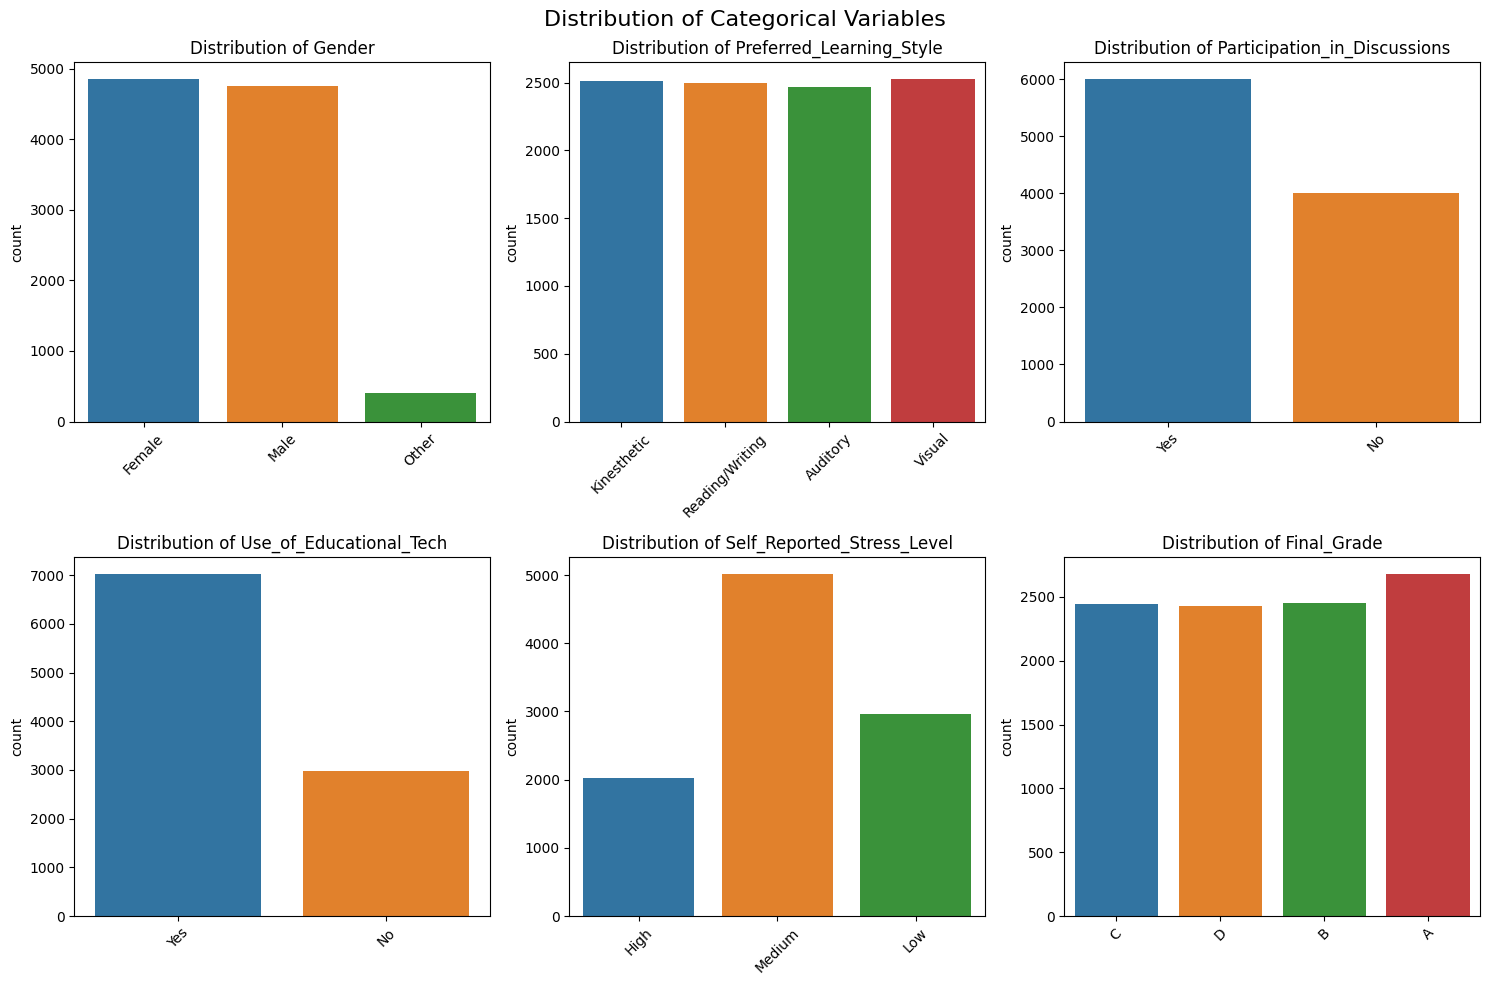

In [32]:
# Create subplots for each categorical variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16)

axes = axes.flatten()

# List of categorical variables
cat_vars = ["Gender", "Preferred_Learning_Style", "Participation_in_Discussions", 
            "Use_of_Educational_Tech", "Self_Reported_Stress_Level", "Final_Grade"]

# Create countplots for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

P5: In this box plot, we can se the minimun and maximum value. the middle line in the blue box denotes the median. The lower bound of the box denotes the 1st quartile. The upper bound of box denotes 3rd quartile. We have outliers over upper bound (above 1.5 times IQR(inter-quartile ratio)) which denotes extreme values, or the presence of an entirely different underlying process.

# 2. Bivariate Analysis

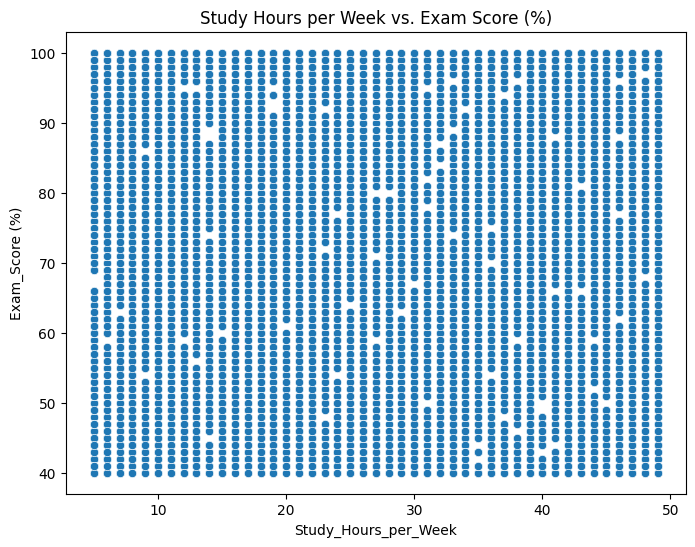

In [33]:
# Numerical vs Numerical: Scatter plot of Study Hours per week vs Exam Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Study_Hours_per_Week", y="Exam_Score (%)")
plt.title("Study Hours per Week vs. Exam Score (%)")
plt.show()

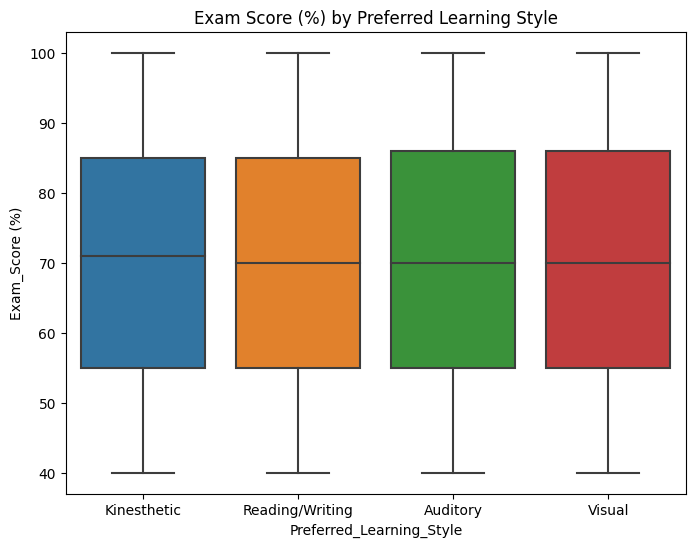

In [34]:
# Categorical vs Numerical: Box plot of Prefered Learning Style vs Exam Score
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Preferred_Learning_Style", y="Exam_Score (%)")
plt.title("Exam Score (%) by Preferred Learning Style")
plt.show()

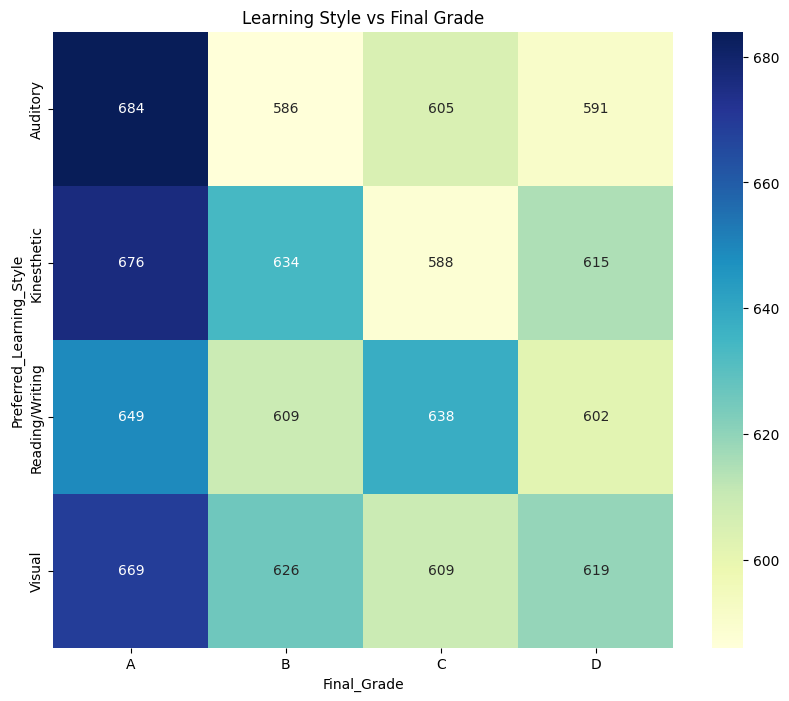

In [40]:
# Categorical vs Categorical: Heatmap of Learning Style vs Final Grade
cross_tab = pd.crosstab(df['Preferred_Learning_Style'], df['Final_Grade'])
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Learning Style vs Final Grade')
plt.show()

# 3.Multivariate analysis

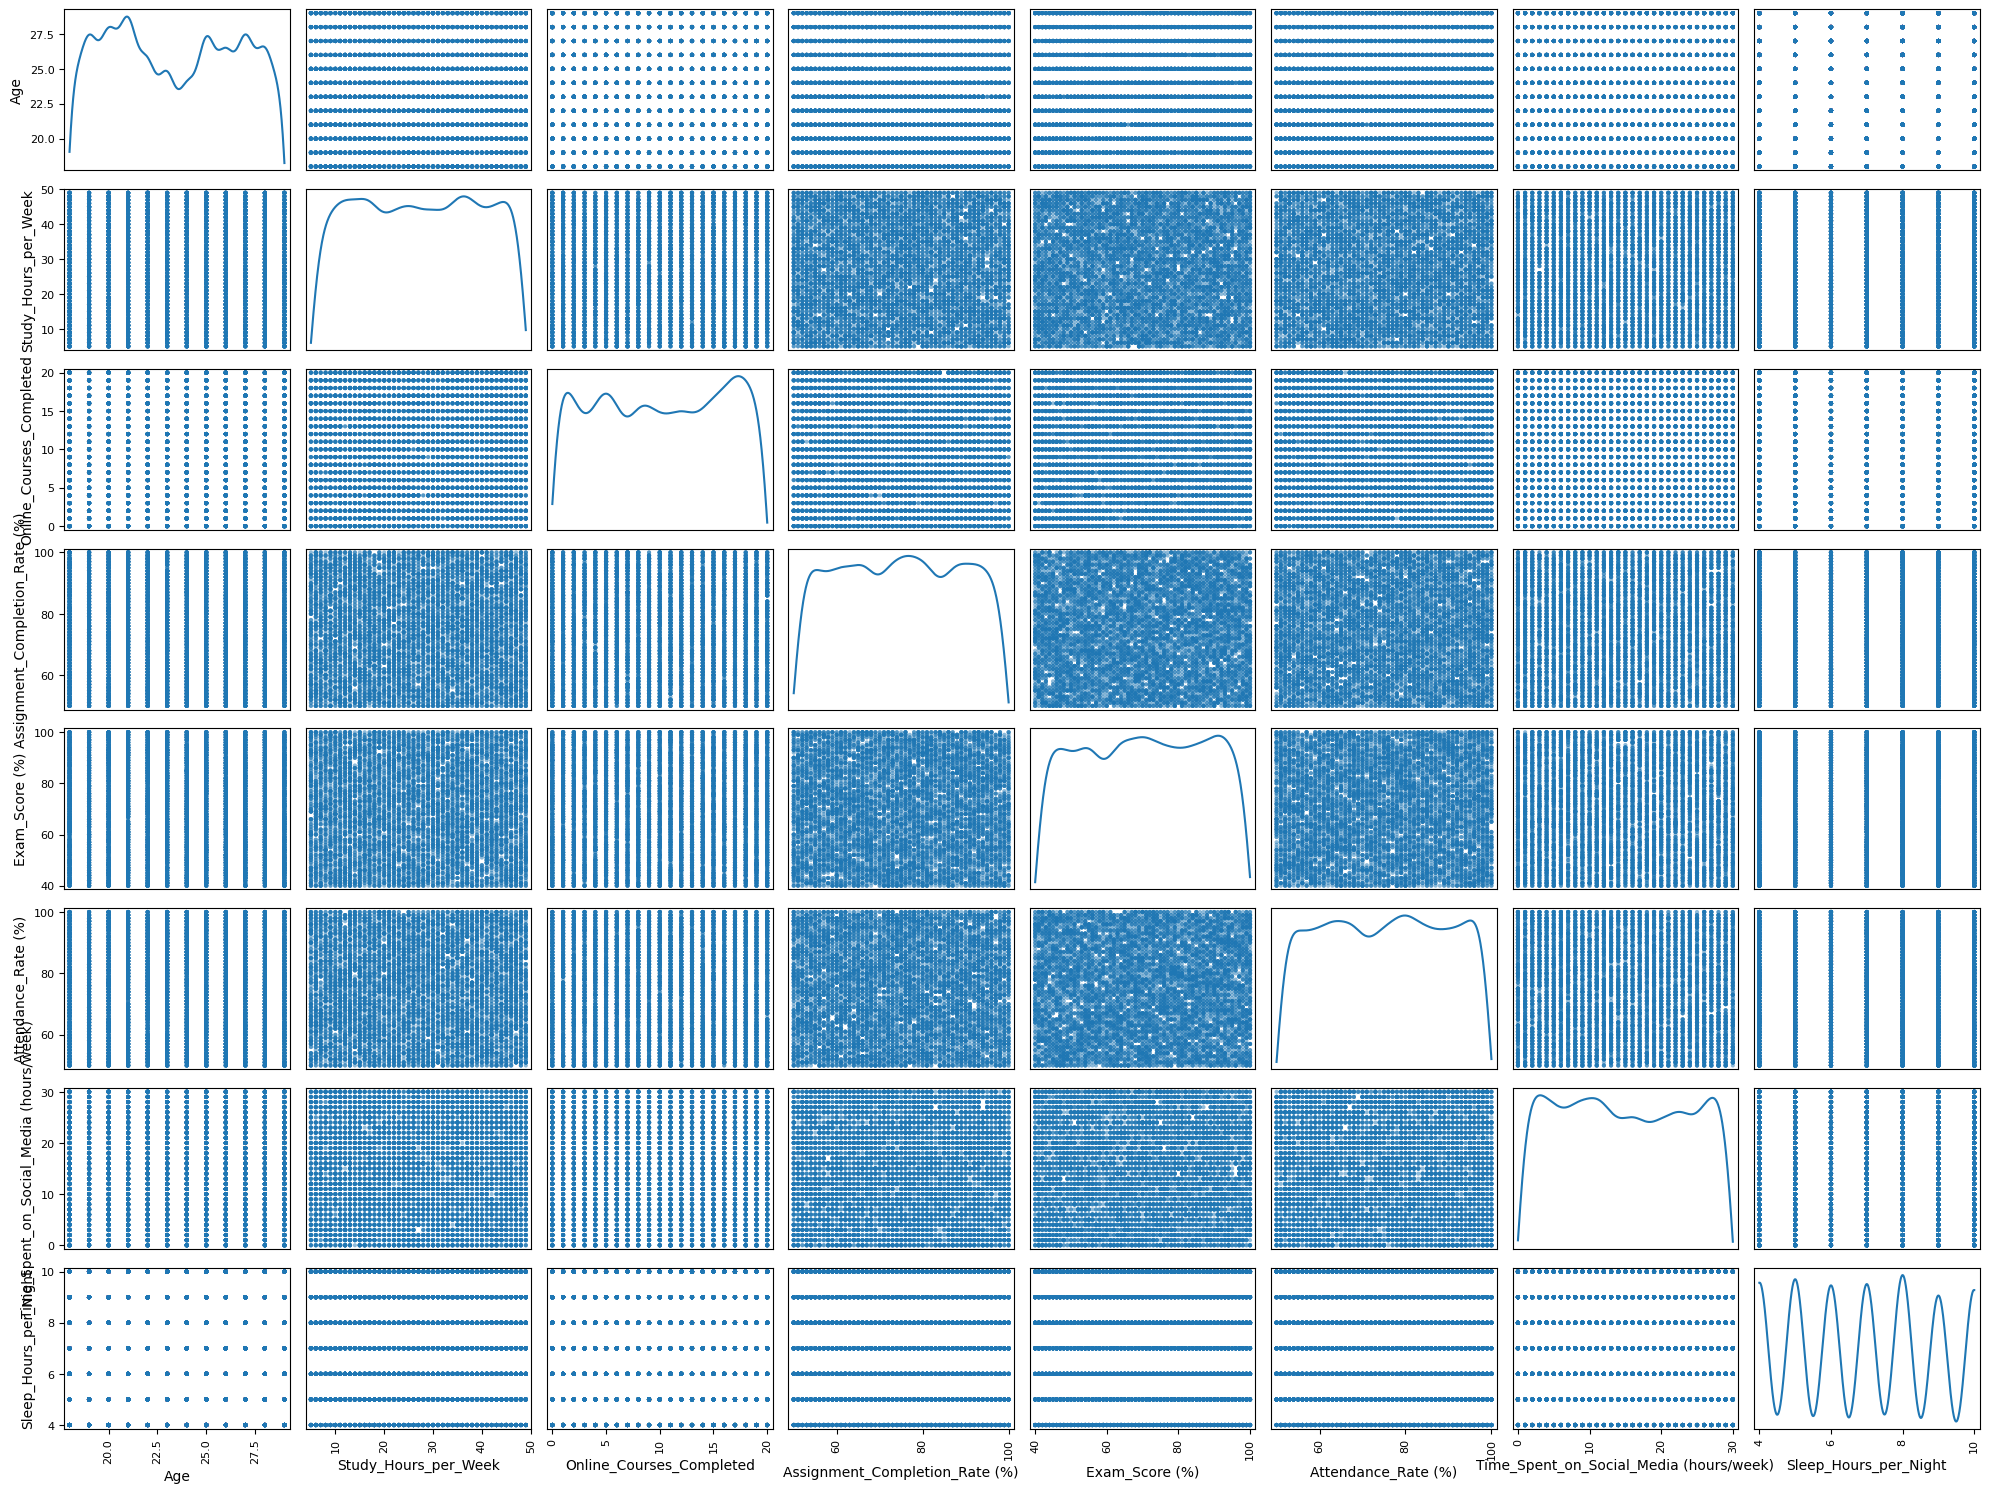

In [41]:
# Numerical variables for multivariate analysis
numerical_vars = ['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 
                  'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 
                  'Attendance_Rate (%)', 'Time_Spent_on_Social_Media (hours/week)', 
                  'Sleep_Hours_per_Night']

# Scatter matrix plot
pd.plotting.scatter_matrix(df[numerical_vars], diagonal="kde", figsize=(20,15))
plt.tight_layout()
plt.show()

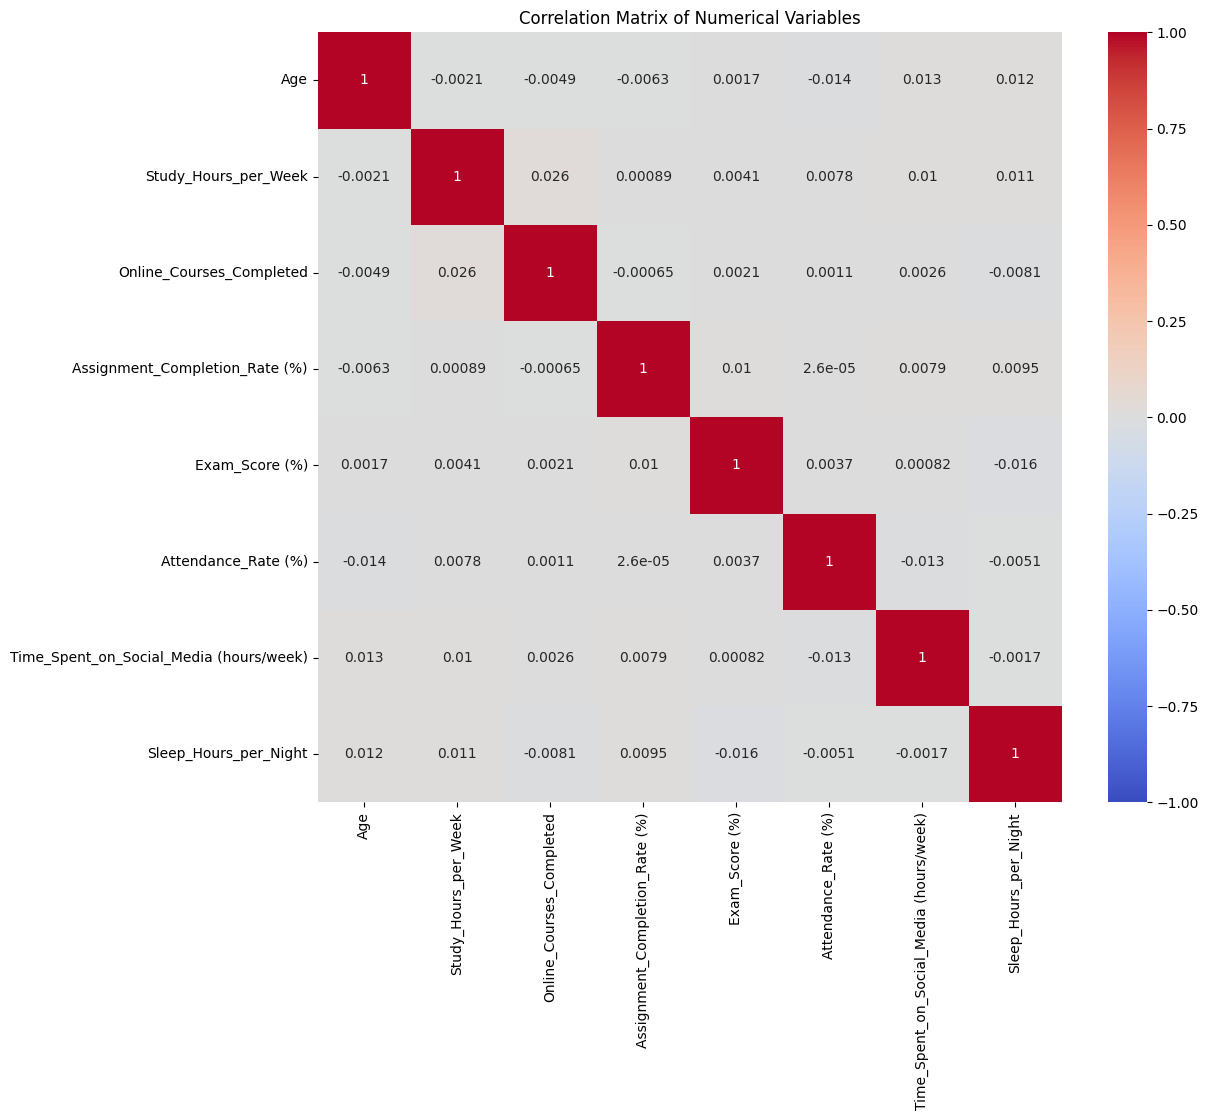

In [42]:
# Correlation heatmap
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

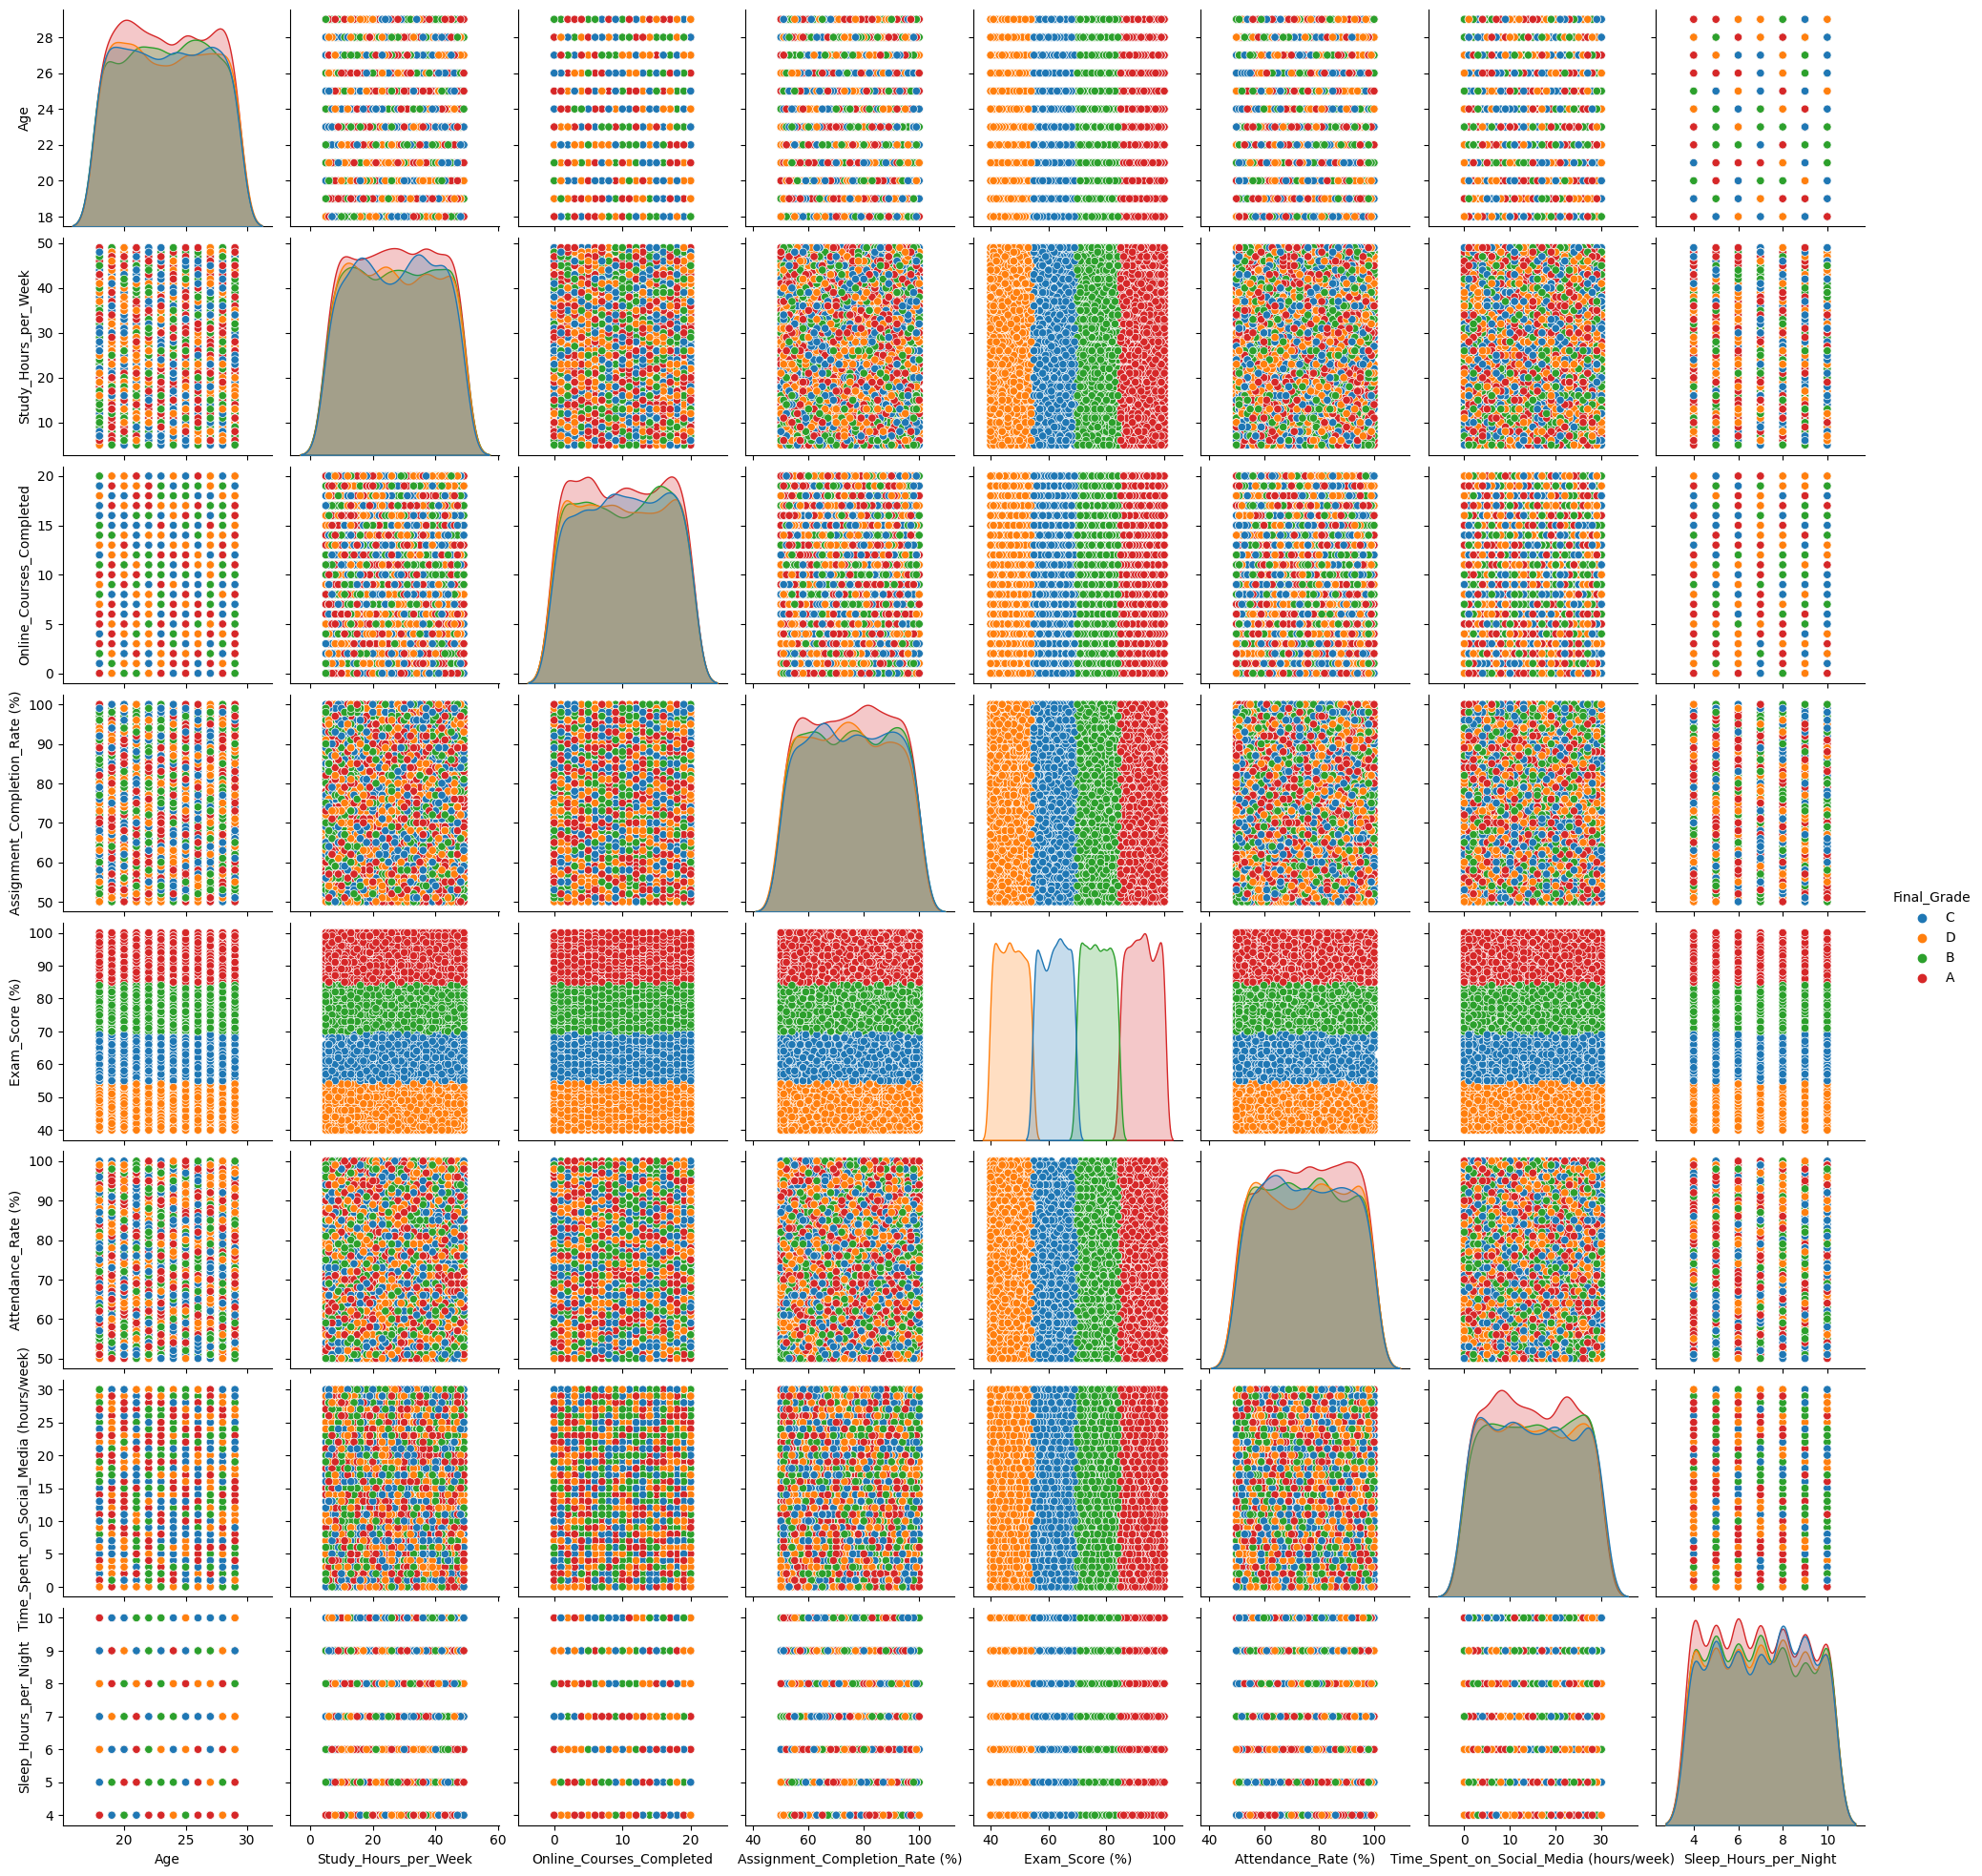

In [43]:
# Pairplot for selected variables
sns.pairplot(df[numerical_vars + ['Final_Grade']], hue='Final_Grade', height=2.5)
plt.show()

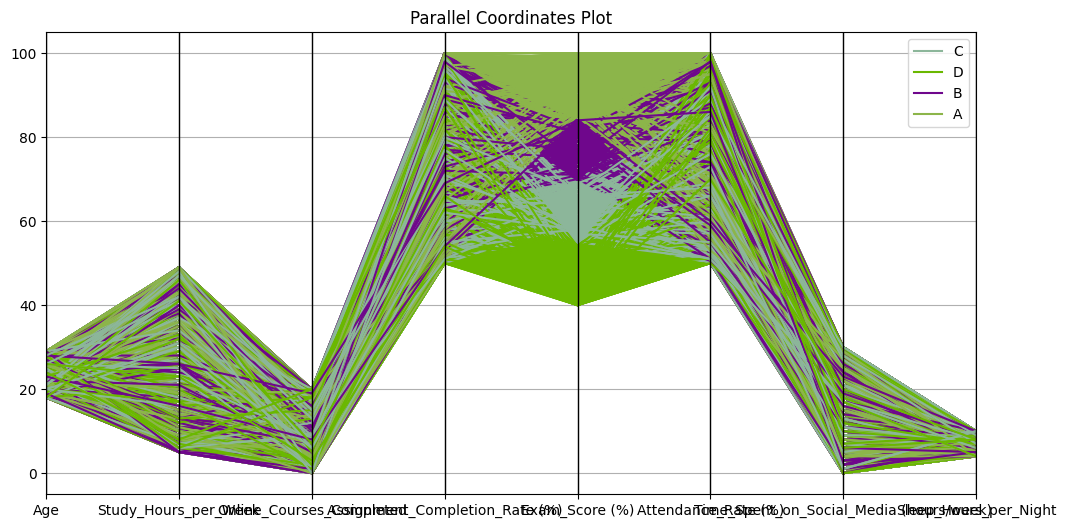

In [44]:
# Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(df, 'Final_Grade', cols=numerical_vars)
plt.title('Parallel Coordinates Plot')
plt.show()

NameError: name 'X' is not defined